<a href="https://colab.research.google.com/github/Klim2007/wall_mart_sales_kaggle/blob/main/WallMart15_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PREDICTION OF SALES BY STORES, CPI & FUEL PRICE 
(USING XGBOOST XGREGRESSOR)

In [168]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [169]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as plt
from datetime import datetime as dt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from xgboost import XGBRegressor
import plotly.express as px
import plotly.graph_objects as go
import datetime
import seaborn as sns

DATA PREPROCESSING

In [170]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/walmart-sales-dataset-of-45stores.csv',parse_dates=['Date'])

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1063: UserWarning:

Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1063: UserWarning:

Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1063: UserWarning:

Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1063: UserWarning:

Parsing '26-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1063: UserWarning:

Parsing '16-04-2010' in DD/MM/YYYY format. Provide format or speci

In [171]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [172]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [173]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [174]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [175]:
df.value_counts()

Store  Date        Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  CPI         Unemployment
1      2010-01-10  1453329.50    0             71.89        2.603       211.671989  7.838           1
30     2012-10-19  437537.29     0             68.52        3.594       223.059808  6.170           1
31     2010-03-12  1338716.37    0             50.43        2.708       211.265543  8.163           1
       2010-03-09  1302047.48    0             82.57        2.577       211.188693  8.099           1
       2010-02-26  1344354.41    0             45.31        2.561       210.975957  8.324           1
                                                                                                   ..
15     2012-10-26  558473.60     0             55.75        4.071       138.728161  7.992           1
       2012-10-19  555652.77     0             52.89        4.153       138.833613  7.992           1
       2012-10-08  590453.63     0             73.99        3.863       138.143774  8.1

Analyzing data and dependancies
1. Store Sales Hollidays vs Working days

In [176]:
store_sales_working = df[df['Holiday_Flag'].isin([0])]
sales_stores = store_sales_working.groupby('Store').Weekly_Sales.mean().reset_index()
fig = px.bar(sales_stores, x = "Store", y ="Weekly_Sales",color="Store",title="Store weekly Sales",height=400)
fig.show()

2.Hollyday_Sales

In [177]:
store_sales_hollidays = df[df['Holiday_Flag'].isin([1])]
a = store_sales_hollidays.groupby(by="Store", dropna=False).mean().reset_index()
fig = px.bar(a, x='Store', y='Weekly_Sales',color='Store',title="Stores Overall Sales")
fig.show()  

employment working days vs hollydays

In [178]:
store_emp_hollidays = df[df['Holiday_Flag'].isin([1])]
store_emp_wrk = df[df['Holiday_Flag'].isin([0])]

store_emp_hollidays['mounth'] = store_emp_hollidays['Date'].dt.month
store_emp_wrk['mounth'] = store_emp_wrk['Date'].dt.month

<ipython-input-178-097336b97de2>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-178-097336b97de2>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [179]:
store_emp_hollidays = store_emp_hollidays.groupby('mounth')['Unemployment'].mean()
store_emp_wrk = store_emp_wrk.groupby('mounth')['Unemployment'].mean()

In [180]:
new_index = []
for i in range (1,13): new_index.append(i)
store_emp_hol = store_emp_hollidays.reindex(new_index)

In [181]:
store_emp_hol

mounth
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7     7.237333
8          NaN
9     8.097489
10    7.968456
11    8.190237
12    8.299607
Name: Unemployment, dtype: float64

In [182]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=months,
    y= store_emp_hol,
    name='unemployment on holidays',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=months,
    y= store_emp_wrk,
    name='unemployment on working days',
    marker_color='lightsalmon'
))

We see that unemployment on holidays is much higher 

CPI index review

In [183]:
CPI_stores = df.groupby('Store').CPI.mean().reset_index()
fig = px.bar(CPI_stores, x='Store', y='CPI',color='Store',title="CPI by Stores")
fig.update_layout(barmode='stack', xaxis={'categoryorder':'category ascending'})
fig.show()

In [184]:
CPI_hollidays = df[df['Holiday_Flag'].isin([1])]
CPI_wrk = df[df['Holiday_Flag'].isin([0])]

CPI_hollidays['mounth'] = CPI_hollidays['Date'].dt.month
CPI_wrk['mounth'] = CPI_wrk['Date'].dt.month

<ipython-input-184-a9381e709855>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-184-a9381e709855>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [185]:
CPI_hollidays.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'mounth'],
      dtype='object')

In [186]:
CPI_on_hollidays = CPI_hollidays.groupby('mounth')['CPI'].mean()
CPI_on_wrk = CPI_wrk.groupby('mounth')['CPI'].mean()

In [187]:
new_index = []
for i in range (1,13): new_index.append(i)
CPI_on_hollidays = CPI_on_hollidays.reindex(new_index)

In [188]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=months,
    y= CPI_on_hollidays,
    name='CPI on holidays',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=months,
    y= CPI_on_wrk,
    name='CPI on working days',
    marker_color='lightsalmon'
))

In [189]:
df['Date']

0      2010-05-02
1      2010-12-02
2      2010-02-19
3      2010-02-26
4      2010-05-03
          ...    
6430   2012-09-28
6431   2012-05-10
6432   2012-12-10
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

In [190]:
df['Year'] = df['Date'].dt.strftime('%Y')
df['Mounth'] = df['Date'].dt.strftime('%m')
df['Day'] = df['Date'].dt.strftime('%d')

<AxesSubplot:xlabel='Year', ylabel='Fuel_Price'>

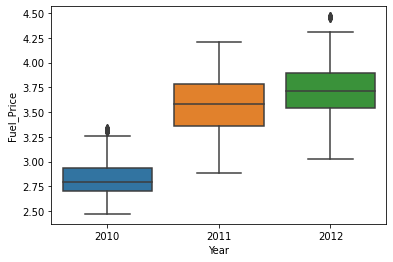

In [191]:
sns.boxplot(x='Year', y='Fuel_Price', data=df)


<AxesSubplot:xlabel='Year', ylabel='Unemployment'>

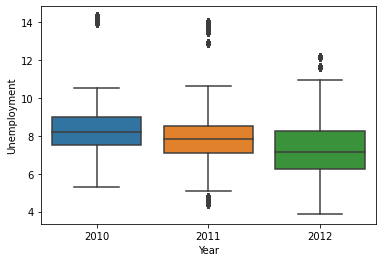

In [192]:
sns.boxplot(x='Year', y='Unemployment', data=df)

<AxesSubplot:xlabel='Year', ylabel='CPI'>

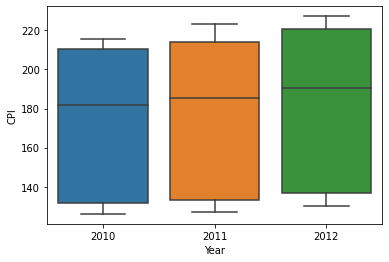

In [193]:
sns.boxplot(x='Year', y='CPI', data=df)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.9/dist-packages/seaborn/di

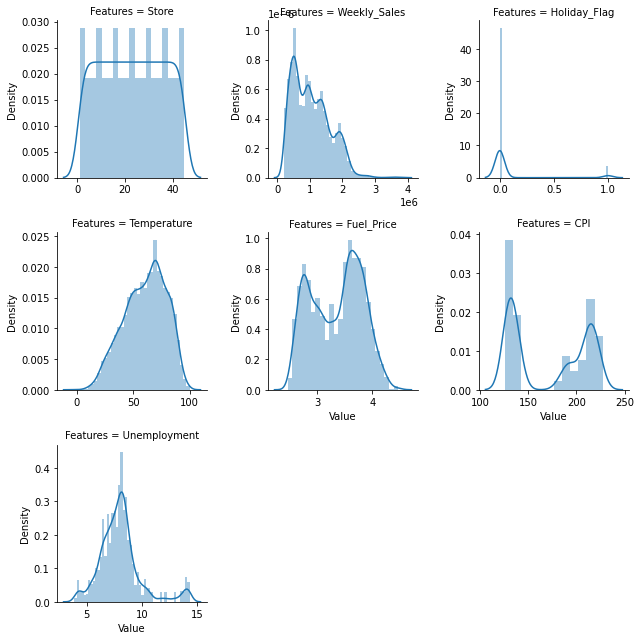

In [194]:
numeric_features = df.drop(df.columns[[1,8,9,10]],axis = 1)

numeric_features = numeric_features.stack().reset_index().rename(
    columns={"level_1": "Features", 0: "Value"})

ax = sns.FacetGrid(data=numeric_features, col="Features",
                  col_wrap=3, sharex=False, sharey=False)
ax = ax.map(sns.distplot, "Value")

In [195]:
numeric_features

,level_0,Features,Value
0,0,Store,1.000000e+00
1,0,Weekly_Sales,1.643691e+06
2,0,Holiday_Flag,0.000000e+00
3,0,Temperature,4.231000e+01
4,0,Fuel_Price,2.572000e+00
...,...,...,...
45040,6434,Holiday_Flag,0.000000e+00
45041,6434,Temperature,5.885000e+01
45042,6434,Fuel_Price,3.882000e+00
45043,6434,CPI,1.923089e+02


In [196]:
df=df.drop(['Date','Day','Year'],axis=1)

In [199]:
# adding 3 more features
mean_month_fuel_price = df.groupby('Mounth')['Fuel_Price'].median().to_dict()
df['mean_month_fuel_price'] = df['Mounth'].map(mean_month_fuel_price)
mean_month_CPI = df.groupby('Mounth')['CPI'].median().to_dict()
df['mean_month_CPI'] = df['Mounth'].map(mean_month_CPI)
mean_month_CPI = df.groupby('Mounth')['CPI'].median().to_dict()
df['mean_month_CPI'] = df['Mounth'].map(mean_month_CPI)

In [205]:
numeric =list(df.dtypes[df.dtypes == float].index)
categoric = list(df.dtypes[df.dtypes == object].index)

In [206]:
df[categoric].dtypes

Mounth    object
dtype: object

Normalizing  features via logarithm 

In [207]:
for i in df[numeric]:
    df[i] = np.log(df[i]+1)

In [208]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Mounth,mean_month_fuel_price,mean_month_CPI
0,0.526589,2.728667,0.000000,1.562007,0.821156,1.849563,1.165939,05,1.524969,5.209740
1,0.526589,2.728598,0.526589,1.542561,0.818186,1.849671,1.165939,12,1.418277,5.212311
2,0.526589,2.727393,0.000000,1.550083,0.813928,1.849706,1.165939,02,1.428396,5.209909
3,0.526589,2.718588,0.000000,1.581751,0.819798,1.849728,1.165939,02,1.428396,5.209909
4,0.526589,2.725029,0.000000,1.581189,0.827614,1.849751,1.165939,05,1.524969,5.209740
...,...,...,...,...,...,...,...,...,...,...
6430,1.574565,2.672594,0.000000,1.646316,0.958905,1.834621,1.184935,09,1.516006,5.213139
6431,1.574565,2.674529,0.000000,1.646346,0.957983,1.834751,1.184398,05,1.524969,5.209740
6432,1.574565,2.674624,0.000000,1.612601,0.959135,1.834880,1.184398,12,1.418277,5.212311
6433,1.574565,2.673072,0.000000,1.619638,0.956749,1.834883,1.184398,10,1.483648,5.214152


Modeling

In [ ]:
X = df_label.drop('default', axis=1)
y = df_label['default']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, shuffle=True, random_state=RAND)